# Inventory Management

## Business Objective:

Poor inventory management leads to a loss in sales which in turn paints an inaccurate picture of lower demand for certain items, making future order predictions based on that past data inherently inaccurate. Instead, smart retailers use real-time data to move inventory where it’s needed before it’s too late. Additionally, they use predictive analytics to decide what to stock and where based on data about regional differences in preferences, weather, etc


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline

In [3]:
data1 = pd.read_csv('prorevenue.csv')
data2 = pd.read_csv('productdetails.csv')

In [4]:
data1.head()

,Product type,Revenue,No of purchases,store status,Promotion applied,Generic Holiday,Education Holiday,DayOfWeek
0,1,14190,890,open,1,0,1,5
1,2,6064,789,open,1,0,1,5
2,3,14190,821,open,1,0,1,5
3,4,13995,456,open,1,0,1,5
4,5,4822,559,open,1,0,1,5


In [5]:
data2.head()

,Unnamed: 0,product type,cost per unit,Time for delivery
0,0,1,457,11
1,1,2,1545,13
2,2,3,1910,14
3,3,4,131,9
4,4,5,868,8


In [6]:
data2.drop(['Unnamed: 0'],inplace=True,axis=1)
data2.head()

,product type,cost per unit,Time for delivery
0,1,457,11
1,2,1545,13
2,3,1910,14
3,4,131,9
4,5,868,8


In [7]:
data1.rename(columns={'Product type':'product_type','No of purchases':'no_of_purchases','store status':'store-status','Promotion applied':'promotion_applied','Generic Holiday':'generic_holiday','Education Holiday':'education_holiday','DayOfWeek':'day_of_week'},inplace=True)
data1.head()


,product_type,Revenue,no_of_purchases,store-status,promotion_applied,generic_holiday,education_holiday,day_of_week
0,1,14190,890,open,1,0,1,5
1,2,6064,789,open,1,0,1,5
2,3,14190,821,open,1,0,1,5
3,4,13995,456,open,1,0,1,5
4,5,4822,559,open,1,0,1,5


In [8]:
data2.rename(columns={'product type':'product_type','cost per unit':'cost_per_unit','Time for delivery':'time_of_delivery'},inplace=True)
data2.head()


,product_type,cost_per_unit,time_of_delivery
0,1,457,11
1,2,1545,13
2,3,1910,14
3,4,131,9
4,5,868,8


In [9]:
data=pd.merge(data1,data2,on='product_type',how='right')
data.head(10)

,product_type,Revenue,no_of_purchases,store-status,promotion_applied,generic_holiday,education_holiday,day_of_week,cost_per_unit,time_of_delivery
0,1,14190,890,open,1,0,1,5,457,11
1,1,5020,546,open,1,0,1,4,457,11
2,1,4782,523,open,1,0,1,3,457,11
3,1,5011,560,open,1,0,1,2,457,11
4,1,6102,612,open,1,0,1,1,457,11
5,1,0,0,close,0,0,0,7,457,11
6,1,4364,500,open,0,0,0,6,457,11
7,1,3706,459,open,0,0,0,5,457,11
8,1,3769,503,open,0,0,0,4,457,11
9,1,3464,463,open,0,0,0,3,457,11


In [10]:
data.shape

(1017209, 10)

In [11]:
data.sample(10)

,product_type,Revenue,no_of_purchases,store-status,promotion_applied,generic_holiday,education_holiday,day_of_week,cost_per_unit,time_of_delivery
997697,1094,4451,379,open,0,0,0,5,813,13
46747,52,6771,426,open,1,0,0,3,456,9
796736,874,2822,368,open,0,0,0,2,684,14
586352,644,0,0,close,1,0,0,2,469,5
414051,454,2227,269,open,0,0,0,6,1895,13
184329,204,5747,544,open,1,0,0,2,1622,14
354452,389,10561,1238,open,1,0,1,5,1624,6
912318,1001,4905,630,open,0,0,0,4,217,8
439760,482,8496,860,open,1,0,0,2,433,5
187019,207,11408,1332,open,1,0,0,5,592,11


In [12]:
data.columns

Index(['product_type', 'Revenue', 'no_of_purchases', 'store-status',
       'promotion_applied', 'generic_holiday', 'education_holiday',
       'day_of_week', 'cost_per_unit', 'time_of_delivery'],
      dtype='object')

No. of Purchases column is removed as it is irrelevant in the dataset

In [13]:
data.drop(['no_of_purchases'],inplace=True,axis=1)
data.columns

Index(['product_type', 'Revenue', 'store-status', 'promotion_applied',
       'generic_holiday', 'education_holiday', 'day_of_week', 'cost_per_unit',
       'time_of_delivery'],
      dtype='object')

In [14]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
product_type,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
Revenue,1017209.0,5773.832433,3849.953591,0.0,3727.0,5744.0,7856.0,41551.0
promotion_applied,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
education_holiday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0
day_of_week,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
cost_per_unit,1017209.0,1012.841002,565.501611,50.0,502.0,1023.0,1519.0,1999.0
time_of_delivery,1017209.0,9.543625,2.857043,5.0,7.0,10.0,12.0,14.0


In [15]:
data.dtypes

product_type          int64
Revenue               int64
store-status         object
promotion_applied     int64
generic_holiday      object
education_holiday     int64
day_of_week           int64
cost_per_unit         int64
time_of_delivery      int64
dtype: object

In [16]:
data.nunique()

product_type          1115
Revenue              21734
store-status             2
promotion_applied        2
generic_holiday          5
education_holiday        2
day_of_week              7
cost_per_unit          863
time_of_delivery        10
dtype: int64

In [17]:
data.isnull().sum()

product_type         0
Revenue              0
store-status         0
promotion_applied    0
generic_holiday      0
education_holiday    0
day_of_week          0
cost_per_unit        0
time_of_delivery     0
dtype: int64

In [18]:
data.product_type.value_counts()

233     942
836     942
308     942
309     942
821     942
       ... 
778     758
677     758
952     758
1065    758
512     758
Name: product_type, Length: 1115, dtype: int64

In [19]:
data.promotion_applied.value_counts()

0    629129
1    388080
Name: promotion_applied, dtype: int64

In [20]:
data.education_holiday.value_counts()

0    835488
1    181721
Name: education_holiday, dtype: int64

In [21]:
data.generic_holiday.value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: generic_holiday, dtype: int64

In [22]:
data['generic_holiday'] = data['generic_holiday'].replace(['a','b','c'],['1','1','1']).astype(int)
data.generic_holiday.value_counts()

0    986159
1     31050
Name: generic_holiday, dtype: int64

In [23]:
data.duplicated(keep='first').sum()


166571

<AxesSubplot:xlabel='Revenue'>

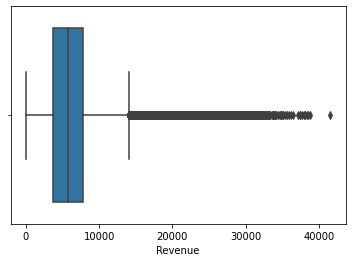

In [24]:
#Checking outliers
sns.boxplot(data=data,x=data["Revenue"])


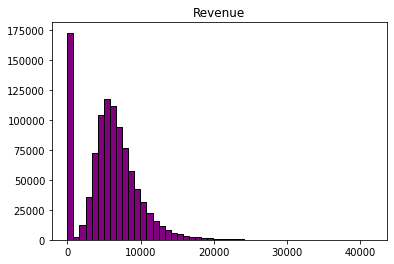

In [25]:
# Revenue Histogram
plt.hist(data.Revenue,bins=50, color='purple', edgecolor='black')
plt.title('Revenue')
plt.show()


In [26]:
# Checking Outliers using IQR
Q1=data["Revenue"].quantile(0.25)
Q3=data["Revenue"].quantile(0.75)
IQR=Q3-Q1
print("Q1=",Q1)
print("Q3=",Q3)
print("IQR=",IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
print("Lower whisker=",Lower_Whisker)
print("Upper Whisker=", Upper_Whisker)


Q1= 3727.0
Q3= 7856.0
IQR= 4129.0
Lower whisker= -2466.5
Upper Whisker= 14049.5


In [27]:
# Outlier Treatment
data = data[data["Revenue"]< Upper_Whisker]


In [28]:
data.shape


(990512, 9)

<AxesSubplot:xlabel='Revenue'>

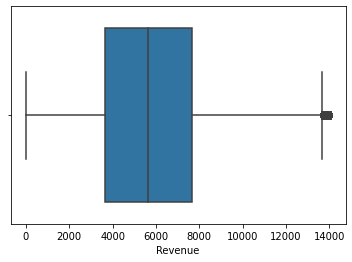

In [29]:
# Revenue data after removing outliers
sns.boxplot(data=data,x=data["Revenue"])

In [30]:
# Sales = REVENUE/COST PER UNIT 
data["sales"] = data['Revenue']/data['cost_per_unit'] 
data.head(10)

,product_type,Revenue,store-status,promotion_applied,generic_holiday,education_holiday,day_of_week,cost_per_unit,time_of_delivery,sales
1,1,5020,open,1,0,1,4,457,11,10.984683
2,1,4782,open,1,0,1,3,457,11,10.463895
3,1,5011,open,1,0,1,2,457,11,10.964989
4,1,6102,open,1,0,1,1,457,11,13.352298
5,1,0,close,0,0,0,7,457,11,0.000000
6,1,4364,open,0,0,0,6,457,11,9.549234
7,1,3706,open,0,0,0,5,457,11,8.109409
8,1,3769,open,0,0,0,4,457,11,8.247265
9,1,3464,open,0,0,0,3,457,11,7.579869
10,1,3558,open,0,0,0,2,457,11,7.785558


In [31]:
# Inventory = REVENUE/COST PER UNIT +10% Buffer stock
data['Inventory'] = data['sales'] + data['sales']* 0.1

In [32]:
data.head()


,product_type,Revenue,store-status,promotion_applied,generic_holiday,education_holiday,day_of_week,cost_per_unit,time_of_delivery,sales,Inventory
1,1,5020,open,1,0,1,4,457,11,10.984683,12.083151
2,1,4782,open,1,0,1,3,457,11,10.463895,11.510284
3,1,5011,open,1,0,1,2,457,11,10.964989,12.061488
4,1,6102,open,1,0,1,1,457,11,13.352298,14.687527
5,1,0,close,0,0,0,7,457,11,0.000000,0.000000


In [33]:
data['store-status']= data['store-status'].replace(['open','close'],[1,0]).astype(int)

In [34]:
print(data[['sales', 'Inventory']])

             sales  Inventory
1        10.984683  12.083151
2        10.463895  11.510284
3        10.964989  12.061488
4        13.352298  14.687527
5         0.000000   0.000000
...            ...        ...
1017204  10.508811  11.559692
1017205  10.000000  11.000000
1017206   9.464758  10.411233
1017207   8.143172   8.957489
1017208   0.000000   0.000000

[990512 rows x 2 columns]


we can also drop sales column

In [35]:
data.drop(['sales'],inplace=True,axis=1)
data.columns

Index(['product_type', 'Revenue', 'store-status', 'promotion_applied',
       'generic_holiday', 'education_holiday', 'day_of_week', 'cost_per_unit',
       'time_of_delivery', 'Inventory'],
      dtype='object')

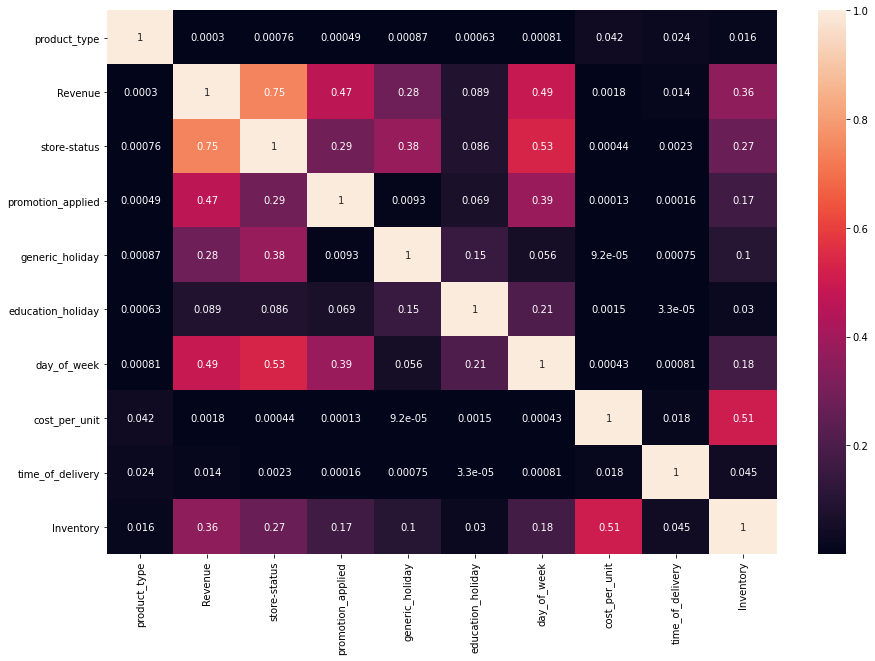

In [36]:
plt.subplots(figsize=(15,10))
correlationMatrix = data.corr().abs()
sns.heatmap(correlationMatrix,annot=True)
plt.show()

In [37]:
data.corr()

,product_type,Revenue,store-status,promotion_applied,generic_holiday,education_holiday,day_of_week,cost_per_unit,time_of_delivery,Inventory
product_type,1.000000,-0.000305,-0.000764,-0.000495,0.000871,0.000629,0.000809,-0.042202,-0.024367,0.016318
Revenue,-0.000305,1.000000,0.745994,0.468239,-0.282175,0.088688,-0.490002,0.001820,-0.013616,0.359116
store-status,-0.000764,0.745994,1.000000,0.292598,-0.378622,0.086257,-0.531705,-0.000436,-0.002287,0.270819
promotion_applied,-0.000495,0.468239,0.292598,1.000000,-0.009299,0.068608,-0.385019,0.000132,-0.000164,0.170544
generic_holiday,0.000871,-0.282175,-0.378622,-0.009299,1.000000,0.151696,-0.056453,0.000092,-0.000747,-0.102358
education_holiday,0.000629,0.088688,0.086257,0.068608,0.151696,1.000000,-0.206084,0.001475,-0.000033,0.030432
day_of_week,0.000809,-0.490002,-0.531705,-0.385019,-0.056453,-0.206084,1.000000,0.000434,0.000807,-0.177907
cost_per_unit,-0.042202,0.001820,-0.000436,0.000132,0.000092,0.001475,0.000434,1.000000,0.018236,-0.505906
time_of_delivery,-0.024367,-0.013616,-0.002287,-0.000164,-0.000747,-0.000033,0.000807,0.018236,1.000000,-0.044513
Inventory,0.016318,0.359116,0.270819,0.170544,-0.102358,0.030432,-0.177907,-0.505906,-0.044513,1.000000


Revenue and store status are also highly correlated(0.75) followed by promotion applied(0.46). 

In [38]:
print(data['Inventory'])

1          12.083151
2          11.510284
3          12.061488
4          14.687527
5           0.000000
             ...    
1017204    11.559692
1017205    11.000000
1017206    10.411233
1017207     8.957489
1017208     0.000000
Name: Inventory, Length: 990512, dtype: float64


In [39]:
weekly_data_Revenue = data.groupby('day_of_week').agg({'Revenue': ['min', 'max', 'sum','count', 'mean']})
print(weekly_data_Revenue)

            Revenue                                       
                min    max        sum   count         mean
day_of_week                                               
1                 0  14049  967074606  135281  7148.635847
2                 0  14049  941172495  141041  6673.041846
3                 0  14049  900976875  142502  6322.555999
4                 0  14045  859327853  142801  6017.659911
5                 0  14049  923327202  142512  6478.943542
6                 0  14047  802737114  142177  5646.040597
7                 0  14047   19063088  144198   132.200779


In [40]:
weekly_data_inventory = data.groupby('day_of_week').agg({'Inventory': ['min', 'max', 'sum','count', 'mean']})
print(weekly_data_inventory)

            Inventory                                             
                  min         max           sum   count       mean
day_of_week                                                       
1                 0.0  301.960784  2.020145e+06  135281  14.932957
2                 0.0  295.490196  1.967601e+06  141041  13.950560
3                 0.0  278.494118  1.878719e+06  142502  13.183811
4                 0.0  280.154902  1.793165e+06  142801  12.557088
5                 0.0  288.588235  1.925627e+06  142512  13.512036
6                 0.0  275.471429  1.685483e+06  142177  11.854824
7                 0.0   86.527820  3.528226e+04  144198   0.244679


In [41]:
data.head()

,product_type,Revenue,store-status,promotion_applied,generic_holiday,education_holiday,day_of_week,cost_per_unit,time_of_delivery,Inventory
1,1,5020,1,1,0,1,4,457,11,12.083151
2,1,4782,1,1,0,1,3,457,11,11.510284
3,1,5011,1,1,0,1,2,457,11,12.061488
4,1,6102,1,1,0,1,1,457,11,14.687527
5,1,0,0,0,0,0,7,457,11,0.000000


### Total columns deleted for further process are No. of purchases, sales.
### Target column is Inventory


In [42]:
new_data = data 

## Feature Selection

In [43]:
new_data.head()

,product_type,Revenue,store-status,promotion_applied,generic_holiday,education_holiday,day_of_week,cost_per_unit,time_of_delivery,Inventory
1,1,5020,1,1,0,1,4,457,11,12.083151
2,1,4782,1,1,0,1,3,457,11,11.510284
3,1,5011,1,1,0,1,2,457,11,12.061488
4,1,6102,1,1,0,1,1,457,11,14.687527
5,1,0,0,0,0,0,7,457,11,0.000000


In [44]:
new_data.shape

(990512, 10)

In [45]:
X = new_data.drop(columns=['Inventory'])
Y=new_data.Inventory

In [46]:
X=X.astype('category')

In [47]:
Y=Y.astype(int)

In [48]:
new_data.dtypes

product_type           int64
Revenue                int64
store-status           int32
promotion_applied      int64
generic_holiday        int32
education_holiday      int64
day_of_week            int64
cost_per_unit          int64
time_of_delivery       int64
Inventory            float64
dtype: object

In [49]:
new_data['Inventory'].apply(np.ceil)

1          13.0
2          12.0
3          13.0
4          15.0
5           0.0
           ... 
1017204    12.0
1017205    11.0
1017206    11.0
1017207     9.0
1017208     0.0
Name: Inventory, Length: 990512, dtype: float64

<AxesSubplot:>

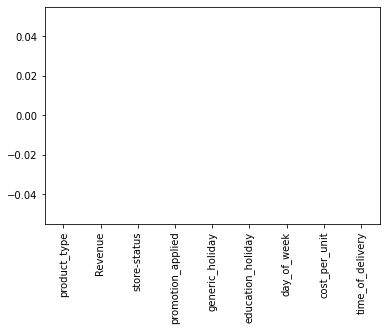

In [50]:
from sklearn.feature_selection import chi2
chi_scores = chi2(X,Y)
chi_scores


p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)


p_values.plot.bar()

In [51]:
chi_scores

(array([3.81569708e+05, 1.39032568e+09, 1.72100712e+05, 8.41148911e+04,
        1.37007388e+05, 7.01673998e+03, 2.83898918e+05, 1.90592253e+08,
        3.51209969e+03]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [52]:
X

,product_type,Revenue,store-status,promotion_applied,generic_holiday,education_holiday,day_of_week,cost_per_unit,time_of_delivery
1,1,5020,1,1,0,1,4,457,11
2,1,4782,1,1,0,1,3,457,11
3,1,5011,1,1,0,1,2,457,11
4,1,6102,1,1,0,1,1,457,11
5,1,0,0,0,0,0,7,457,11
...,...,...,...,...,...,...,...,...,...
1017204,1115,4771,1,0,0,1,6,454,14
1017205,1115,4540,1,0,0,1,5,454,14
1017206,1115,4297,1,0,0,1,4,454,14
1017207,1115,3697,1,0,0,1,3,454,14


### Robust Scaler

In [53]:
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(X)
X = pd.DataFrame(robust_df)

In [54]:
X.head()

,0,1,2,3,4,5,6,7,8
0,-0.99287,-0.157711,0.0,1.0,0.0,1.0,0.00,-0.558185,0.2
1,-0.99287,-0.217196,0.0,1.0,0.0,1.0,-0.25,-0.558185,0.2
2,-0.99287,-0.159960,0.0,1.0,0.0,1.0,-0.50,-0.558185,0.2
3,-0.99287,0.112722,0.0,1.0,0.0,1.0,-0.75,-0.558185,0.2
4,-0.99287,-1.412397,-1.0,0.0,0.0,0.0,0.75,-0.558185,0.2


## Model Building

In [55]:
model_data=new_data.sample(frac=0.10)
model_data.head()

,product_type,Revenue,store-status,promotion_applied,generic_holiday,education_holiday,day_of_week,cost_per_unit,time_of_delivery,Inventory
208888,231,3782,1,0,0,0,5,1289,14,3.227463
224298,247,6412,1,0,0,0,6,1058,11,6.666541
911152,999,11476,1,1,0,0,2,1287,12,9.808547
749766,823,4068,1,0,0,0,4,144,7,31.075000
889068,975,8473,1,0,0,0,1,1180,13,7.898559


In [56]:
model_data['Inventory'].apply(np.ceil)

208888     4.0
224298     7.0
911152    10.0
749766    32.0
889068     8.0
          ... 
669578    45.0
309611     0.0
90805     29.0
214176    14.0
914212    11.0
Name: Inventory, Length: 99051, dtype: float64

In [57]:
model_data.head()

,product_type,Revenue,store-status,promotion_applied,generic_holiday,education_holiday,day_of_week,cost_per_unit,time_of_delivery,Inventory
208888,231,3782,1,0,0,0,5,1289,14,3.227463
224298,247,6412,1,0,0,0,6,1058,11,6.666541
911152,999,11476,1,1,0,0,2,1287,12,9.808547
749766,823,4068,1,0,0,0,4,144,7,31.075000
889068,975,8473,1,0,0,0,1,1180,13,7.898559


## Linear Regression

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [59]:
#import model_selection
import sklearn.model_selection
import numpy as np
#from sklearn import cross_validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
k = 5
kf = KFold(n_splits=k, random_state=None)

In [60]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train.values.ravel())

LinearRegression()

In [61]:
print(regressor.intercept_)
print(regressor.coef_)

11.015587996009778
[-1.95364562e-01  8.15384297e+00 -2.41429982e-01  1.35403507e-01
 -9.52631356e-02 -1.30896997e-02 -1.92956738e-02 -1.75745359e+01
 -1.03705922e+00]


In [62]:
y_pred = regressor.predict(X_test)
y_pred

array([-17.9665548 ,  11.97960534,  29.91025729, ...,  -2.4053092 ,
         7.11458107, -16.24001416])

In [63]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 8.140260099999736
Mean Squared Error: 227.60014635552506
Root Mean Squared Error: 15.086422583088579


In [64]:
print("Train Accuracy:",regressor.score(X_train, y_train))
print("Test Accuracy:",regressor.score(X_test, y_test))

Train Accuracy: 0.38245725144708764
Test Accuracy: 0.38638992419794516


In [65]:
result = cross_val_score(regressor , X, Y, cv = kf)
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.38401125368320344


## Multilinear Regression

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [67]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

In [68]:
#import model_selection
import sklearn.model_selection
#from sklearn import cross_validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
k = 5
kf = KFold(n_splits=k, random_state=None)

In [69]:
clf.fit(X_train, y_train.values.ravel())

LinearRegression()

In [70]:
y_pred = clf.predict(X_test)

In [71]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 8.121593215893977
Mean Squared Error: 223.13237227873137
Root Mean Squared Error: 14.937616017247578


In [72]:
print("Train Accuracy:",regressor.score(X_train, y_train))
print("Test Accuracy:",regressor.score(X_test, y_test))

Train Accuracy: 0.3822848963144624
Test Accuracy: 0.3871737895338613


In [73]:
result = cross_val_score(regressor , X, Y, cv = kf)
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.38401125368320344


## Decision Tree

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X , Y, test_size = 0.2, random_state = 42)

In [75]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf.fit(X_train, y_train)

DecisionTreeRegressor()

In [76]:
#tree.plot_tree(clf)

In [77]:
from sklearn.tree import plot_tree
y_pred = clf.predict(X_test)
y_pred

array([ 1.,  3.,  7., ..., 19., 14.,  0.])

In [78]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
 max_features=None, max_leaf_nodes=None,
 min_impurity_decrease=0.0, min_impurity_split=None,
 min_samples_leaf=1, min_samples_split=2,
 min_weight_fraction_leaf=0.0, presort=False, random_state=None,
 splitter='best')

DecisionTreeClassifier(presort=False)

In [79]:
# Visualize the tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_7 <= -0.84
|   |--- feature_1 <= -0.20
|   |   |--- feature_1 <= -0.86
|   |   |   |--- feature_1 <= -1.24
|   |   |   |   |--- feature_1 <= -1.35
|   |   |   |   |   |--- value: [0.00]
|   |   |   |   |--- feature_1 >  -1.35
|   |   |   |   |   |--- value: [9.00]
|   |   |   |--- feature_1 >  -1.24
|   |   |   |   |--- feature_7 <= -0.95
|   |   |   |   |   |--- feature_1 <= -0.97
|   |   |   |   |   |   |--- feature_7 <= -0.96
|   |   |   |   |   |   |   |--- value: [21.00]
|   |   |   |   |   |   |--- feature_7 >  -0.96
|   |   |   |   |   |   |   |--- value: [34.00]
|   |   |   |   |   |--- feature_1 >  -0.97
|   |   |   |   |   |   |--- feature_1 <= -0.91
|   |   |   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_7 <= -0.96
|   |   |   |   |   |   |   |   |   |--- value: [40.00]
|   |   |   |   |   |   |   |   |--- feature_7 >  -0.96
|   |   |   |   |   |   |   |   |   |--- value: [41.00]
|   |   |   |   |   |   |   |--- feature_5 

In [80]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.01638036778847367
Mean Squared Error: 0.030423567538098866
Root Mean Squared Error: 0.17442352919861145


In [81]:
print("Train Accuracy:",regressor.score(X_train, y_train))
print("Test Accuracy:",regressor.score(X_test, y_test))

Train Accuracy: 0.3822848963144624
Test Accuracy: 0.3871737895338613


## XGBoost

In [82]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
import xgboost

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [84]:
model = xgboost.XGBRegressor()

In [85]:
model.fit(X_train,y_train.values.ravel())

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [86]:
y_pred = model.predict(X_test)
y_pred

array([ 4.5625008e+01,  1.6948011e-02,  2.0551727e+00, ...,
        9.8462601e+00, -3.0932372e-02,  3.8765557e+00], dtype=float32)

In [87]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.23060743777015605
Mean Squared Error: 0.12737455209095266
Root Mean Squared Error: 0.35689571598851205


In [88]:
print("Train Accuracy:",regressor.score(X_train, y_train))
print("Test Accuracy:",regressor.score(X_test, y_test))

Train Accuracy: 0.38318942111848364
Test Accuracy: 0.3834330864582406


## SVM

In [89]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)

In [90]:
#from sklearn.svm import SVR
#from sklearn.svm import SVC
#svclassifier = SVR(kernel='poly')
#svclassifier.fit(X_train, y_train)

In [91]:
#y_pred = svclassifier.predict(X_test)
#y_pred

In [92]:
#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [93]:
#print("Train Accuracy:",svclassifier.score(X_train, y_train))
#print("Test Accuracy:",svclassifier.score(X_test, y_test))

## Random Forest Regressor

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state = 42)

In [95]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200)
regressor.fit(X_train, y_train.values.ravel())

RandomForestRegressor(n_estimators=200)

In [96]:
y_pred = regressor.predict(X_test)
y_pred

array([ 1.   ,  3.   ,  6.545, ..., 18.985, 14.   ,  0.   ])

In [97]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.022368692044037707
Mean Squared Error: 0.013969945558623539
Root Mean Squared Error: 0.11819452423282366


In [98]:
print("Train Accuracy:",regressor.score(X_train, y_train))
print("Test Accuracy:",regressor.score(X_test, y_test))

Train Accuracy: 0.9999951776784078
Test Accuracy: 0.999961630250279
